In [1]:
# You may need to install the « cryptography » module

import os
import time
import codecs
import matplotlib.pyplot as plt 
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.twofactor.hotp import HOTP
from cryptography.hazmat.primitives.hashes import SHA1


In [2]:
def brute_force(main_HOTP, value_to_find, key_bits_length, hotp_length, time_limit_sec):
    '''
    Tries to find find an HOTP token by brute force.
    '''
    print('HOTP value to find: ', value_to_find)

    solution = None
    tries_counter = 0
    t_start = time.time()
    # Brute force time limit
    t_end = t_start + time_limit_sec

    while time.time() < t_end:
        # Random key generation
        _key_bits = os.urandom(key_bits_length)
        _HTOP = HOTP(_key_bits, hotp_length, SHA1(), backend=default_backend())
        _hotp_value = _HTOP.generate(0)

        tries_counter += 1

        # Tests this key
        try:
            # It works !
            main_HOTP.verify(_hotp_value, 0)
            solution = _hotp_value
            t_end = time.time()
            break
        except:
            # Not this time...
            pass
        
    # Prints some computation information
    print('Number of tries: ', tries_counter)
    print('Time elapsed: %.2f [s]' % (t_end - t_start))

    if solution:
        print('A solution has been found: ', solution)
        print()
        return t_end - t_start
    else:
        print('No solution found...')
        print()
        return False
        
def n_brute_force(main_HOTP, n, value_to_find, key_bits_length, hotp_length, time_limit_sec):
    '''
    Runs n times the brute_force function (in order to compute an average).
    '''
    total_time = 0
    success_counter = 0
    
    for i in range(0, n):
        print('--- (%d/%d) ---' % (i+1, (n)))
        
        solution_time = brute_force(main_HOTP, value_to_find, key_bits_length, hotp_length, time_limit_sec)
        if (solution_time):
            total_time += solution_time
            success_counter += 1
    
    # Average
    if success_counter > 0:
        return total_time / success_counter
    else:
        return 0
    
def plot_n_brute_force(n, key_bits_length_start, key_bits_length_end, hotp_length, time_limit_sec):
    '''
    Runs the n_brute_force function for different key lengths and plots the associated time avereages.
    '''
    x_axis = range(key_bits_length_start, key_bits_length_end + 1)
    y_axis = []
    
    for i in x_axis:
        print('----- Key Bits Length: %d -----' % i)
        
        # Generates the HOTP token to find
        key_bits = os.urandom(i)
        hotp = HOTP(key_bits, hotp_length, SHA1(), backend=default_backend())
        hotp_value = hotp.generate(0)
        # Raises a InvalidToken if the hotp_value cannot be verified
        hotp.verify(hotp_value, 0)
        
        avrg = n_brute_force(hotp, n, hotp_value, i, hotp_length, time_limit_sec)
        y_axis.append(avrg)
        
        time_limit_sec += 15
        
    # Plot
    plt.scatter(x_axis, y_axis, color='r')
    plt.title('Authenticate Brute Force')
    plt.xlabel('Key Bits Length')
    plt.ylabel('Time Elapsed [s]')
    plt.show()
        

----- Key Bits Length: 16 -----
--- (1/10) ---
HOTP value to find:  b'319859'
Number of tries:  783369
Time elapsed: 47.27 [s]
A solution has been found:  b'319859'

--- (2/10) ---
HOTP value to find:  b'319859'
Number of tries:  169736
Time elapsed: 10.46 [s]
A solution has been found:  b'319859'

--- (3/10) ---
HOTP value to find:  b'319859'
Number of tries:  1004668
Time elapsed: 60.00 [s]
No solution found...

--- (4/10) ---
HOTP value to find:  b'319859'
Number of tries:  666082
Time elapsed: 40.03 [s]
A solution has been found:  b'319859'

--- (5/10) ---
HOTP value to find:  b'319859'
Number of tries:  1004976
Time elapsed: 60.00 [s]
No solution found...

--- (6/10) ---
HOTP value to find:  b'319859'
Number of tries:  1003987
Time elapsed: 60.00 [s]
No solution found...

--- (7/10) ---
HOTP value to find:  b'319859'
Number of tries:  88210
Time elapsed: 5.30 [s]
A solution has been found:  b'319859'

--- (8/10) ---
HOTP value to find:  b'319859'
Number of tries:  422574
Time elap

Number of tries:  255213
Time elapsed: 17.13 [s]
A solution has been found:  b'399088'

--- (3/10) ---
HOTP value to find:  b'399088'
Number of tries:  307288
Time elapsed: 20.39 [s]
A solution has been found:  b'399088'

--- (4/10) ---
HOTP value to find:  b'399088'
Number of tries:  1295619
Time elapsed: 84.11 [s]
A solution has been found:  b'399088'

--- (5/10) ---
HOTP value to find:  b'399088'
Number of tries:  1729577
Time elapsed: 150.00 [s]
No solution found...

--- (6/10) ---
HOTP value to find:  b'399088'
Number of tries:  656911
Time elapsed: 56.75 [s]
A solution has been found:  b'399088'

--- (7/10) ---
HOTP value to find:  b'399088'
Number of tries:  1346977
Time elapsed: 84.91 [s]
A solution has been found:  b'399088'

--- (8/10) ---
HOTP value to find:  b'399088'
Number of tries:  331284
Time elapsed: 21.77 [s]
A solution has been found:  b'399088'

--- (9/10) ---
HOTP value to find:  b'399088'
Number of tries:  1675477
Time elapsed: 102.32 [s]
A solution has been foun

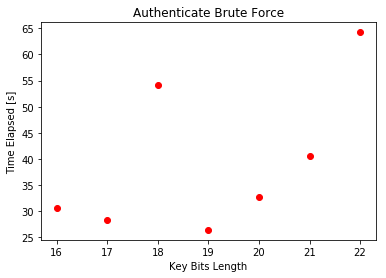

In [3]:
# The key should be randomly generated and be at least 128 bits ; it is
# recommended to be 160 bits length (20 * 8). This key MUST be kept secret.
BRUTE_FORCE_N = 10
KEY_BITS_LENGTH_START = 16
KEY_BITS_LENGTH_END = 22
HOTP_TOKEN_LENGTH = 6
TIME_LIMIT_START_SEC = 60

plot_n_brute_force(BRUTE_FORCE_N, KEY_BITS_LENGTH_START, KEY_BITS_LENGTH_END, HOTP_TOKEN_LENGTH, TIME_LIMIT_START_SEC)